In [1]:
import pandas as pd
import joypy
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dir = 'evidence_nm/'

In [8]:
df_sa = pd.read_csv('lifespan_surfacearea_demos_46K.csv')

In [49]:
df_tr = pd.read_csv(os.path.join(data_dir,'lifespan_controls_yeo17_tr.csv'), low_memory=False) 
df_te = pd.read_csv(os.path.join(data_dir,'lifespan_controls_yeo17_te.csv'), low_memory=False)
df_transfer = pd.read_csv(os.path.join(data_dir,'lifespan_transfer_controls_patients_gt4_yeo17.csv'), low_memory=False) 

In [59]:
df_transfer_opn = df_transfer.query('site == "OPN-ds000243" | site == "OPN-ds002843" | site == "OPN-ds003798"')

In [60]:
df_transfer_sz = df_transfer.query('site == "UMich_SZG" | site == "cobre"')

In [ ]:
pd.set_option('display.max_rows', None)

In [52]:
df_tr.groupby(by='site')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
ABCD_01,106.0,9.944182,0.607571,9.000000,9.375000,10.083333,10.416667,10.916667
ABCD_02,402.0,10.092040,0.626734,9.000000,9.583333,10.083333,10.750000,10.916670
ABCD_03,434.0,9.877688,0.616341,9.000000,9.250000,9.833333,10.416667,10.916670
ABCD_04,421.0,9.800277,0.641086,9.000000,9.166667,9.750000,10.333333,10.916670
ABCD_05,244.0,9.878074,0.627007,9.000000,9.250000,9.833333,10.416667,10.916670
ABCD_06,374.0,10.011141,0.586363,9.000000,9.583333,10.083330,10.500000,10.916670
ABCD_07,205.0,9.893089,0.613194,9.000000,9.333333,9.916667,10.416667,10.916670
ABCD_08,174.0,10.087165,0.609996,9.000000,9.604167,10.166667,10.666667,10.916670
ABCD_09,278.0,9.980815,0.581229,9.000000,9.500000,9.916667,10.500000,10.916670


In [53]:
df_tr.groupby(by='site')['sex'].value_counts()

site             sex
ABCD_01          0.0      58
                 1.0      48
ABCD_02          1.0     210
                 0.0     192
ABCD_03          1.0     222
                 0.0     212
ABCD_04          1.0     213
                 0.0     208
ABCD_05          0.0     125
                 1.0     119
ABCD_06          0.0     198
                 1.0     176
ABCD_07          1.0     105
                 0.0     100
ABCD_08          1.0      90
                 0.0      84
ABCD_09          0.0     143
                 1.0     135
ABCD_10          0.0     174
                 1.0     154
ABCD_11          0.0     152
                 1.0     140
ABCD_12          1.0      58
                 0.0      52
ABCD_13          0.0     161
                 1.0     159
ABCD_14          1.0     216
                 0.0     189
ABCD_15          0.0     115
                 1.0     115
ABCD_16          1.0     406
                 0.0     330
ABCD_17          1.0     175
                 0.0  

In [54]:
df_te.groupby(by='site')['sex'].value_counts()

site             sex
ABCD_01          1.0     15
                 0.0     12
ABCD_02          1.0     54
                 0.0     46
ABCD_03          1.0     55
                 0.0     53
ABCD_04          0.0     55
                 1.0     50
ABCD_05          0.0     36
                 1.0     25
ABCD_06          1.0     50
                 0.0     44
ABCD_07          1.0     31
                 0.0     20
ABCD_08          1.0     23
                 0.0     20
ABCD_09          0.0     39
                 1.0     31
ABCD_10          1.0     43
                 0.0     39
ABCD_11          1.0     38
                 0.0     35
ABCD_12          0.0     14
                 1.0     14
ABCD_13          0.0     48
                 1.0     32
ABCD_14          1.0     51
                 0.0     50
ABCD_15          0.0     29
                 1.0     28
ABCD_16          1.0    105
                 0.0     79
ABCD_17          1.0     46
                 0.0     39
ABCD_18          1.0     23

In [16]:
df_te.groupby(by='site')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
ABCD_01,73.0,9.956621,0.607329,9.000000,9.416667,10.083333,10.500000,10.916667
ABCD_02,258.0,10.065246,0.615977,9.000000,9.583333,10.000000,10.666667,10.916670
ABCD_03,260.0,9.910577,0.612583,9.000000,9.333333,10.000000,10.416667,10.916670
ABCD_04,268.0,9.775187,0.640004,9.000000,9.083333,9.750000,10.250000,10.916670
ABCD_05,144.0,9.961227,0.625081,9.000000,9.333333,10.083333,10.500000,10.916670
ABCD_06,240.0,10.029514,0.593111,9.000000,9.562500,10.083333,10.500000,10.916670
ABCD_07,128.0,9.925130,0.607877,9.000000,9.333333,9.916667,10.416668,10.916667
ABCD_08,104.0,10.076122,0.591552,9.000000,9.666667,10.166667,10.583333,10.916670
ABCD_09,175.0,9.892857,0.605876,9.000000,9.333333,9.750000,10.416667,10.916670


<Figure size 2280x1520 with 0 Axes>

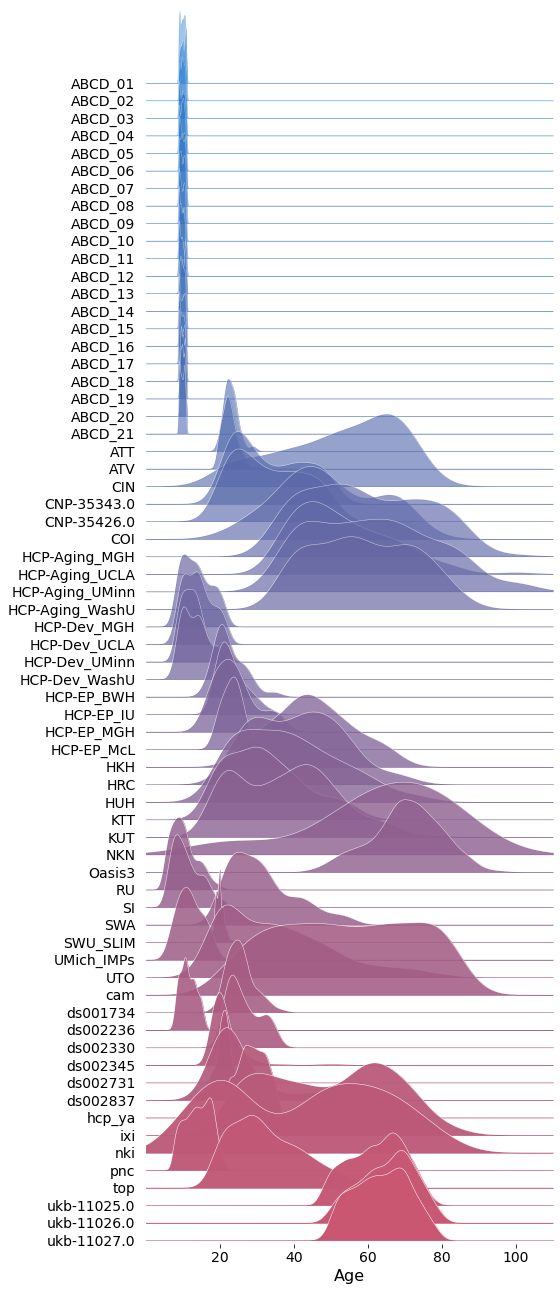

In [32]:
def color_gradient(x=0.0, start=(0, 0, 0), stop=(1, 1, 1)):
    r = np.interp(x, [0, 1], [start[0], stop[0]])
    g = np.interp(x, [0, 1], [start[1], stop[1]])
    b = np.interp(x, [0, 1], [start[2], stop[2]])
    return (r, g, b)
plt.figure(dpi=380)
fig, axes = joypy.joyplot(df_sa, column=['age'], overlap=1.0, by="site", ylim='own', fill=True, figsize=(8,18), legend=False, xlabels=True, ylabels=True,  x_range=(0,110), 
                          colormap=lambda x: color_gradient(x, start=(.08, .45, .8),stop=(.8, .34, .44)), alpha=0.6, linewidth=.5, linecolor='w', fade=True)
#plt.title('Age Distribution', fontsize=18, color='black', alpha=1)
plt.rc("font", size=14)
plt.xlabel('Age', fontsize=16, color='black', alpha=1)
plt.ylabel('Site', fontsize=14, color='black', alpha=1)
#plt.show()
plt.savefig('FullSample_SurfArea_site_age.png', dpi=300)

<Figure size 2280x1520 with 0 Axes>

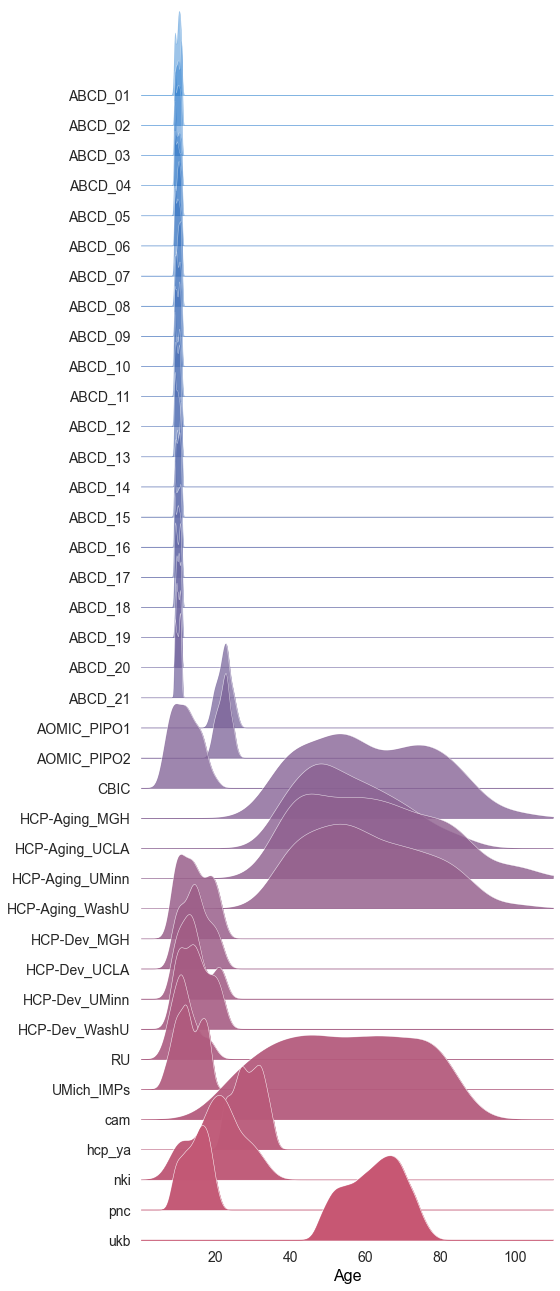

In [55]:
plt.figure(dpi=380)
fig, axes = joypy.joyplot(df_tr, column=['age'], overlap=1.0, by="site", ylim='own', fill=True, figsize=(8,18), legend=False, xlabels=True, ylabels=True,  x_range=(0,110), 
                          colormap=lambda x: color_gradient(x, start=(.08, .45, .8),stop=(.8, .34, .44)), alpha=0.6, linewidth=.5, linecolor='w', fade=True)
#plt.title('Age Distribution', fontsize=18, color='black', alpha=1)
plt.rc("font", size=14)
plt.xlabel('Age', fontsize=16, color='black', alpha=1)
plt.ylabel('Site', fontsize=14, color='black', alpha=1)
#plt.show()
plt.savefig('Train_17K_site_age.png', dpi=300)

<Figure size 2280x1520 with 0 Axes>

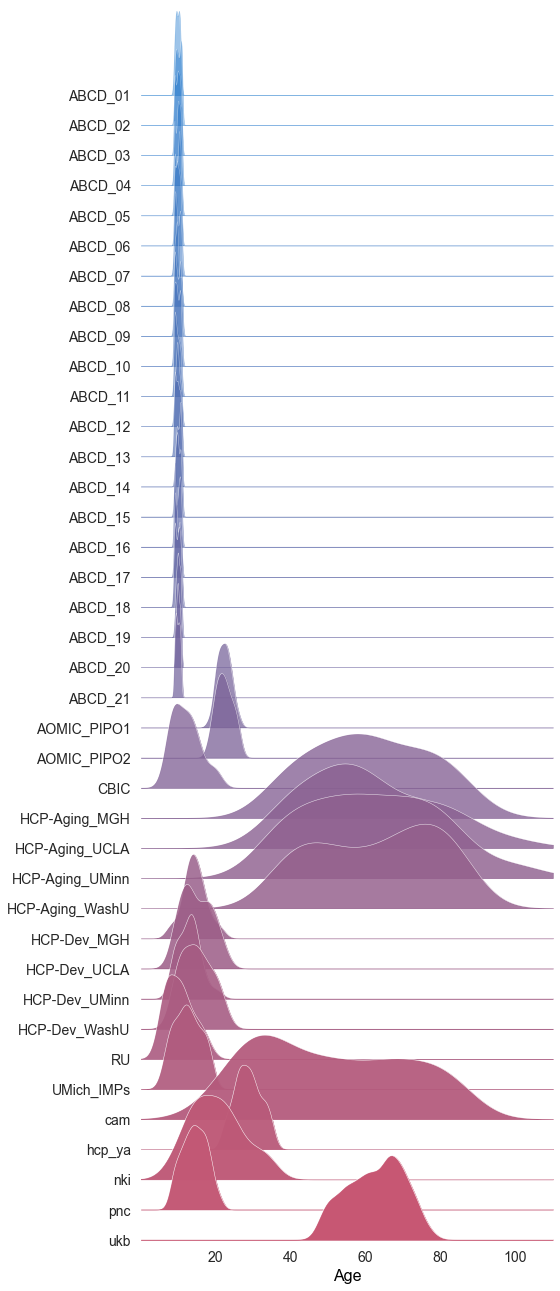

In [56]:
plt.figure(dpi=380)
fig, axes = joypy.joyplot(df_te, column=['age'], overlap=1.0, by="site", ylim='own', fill=True, figsize=(8,18), legend=False, xlabels=True, ylabels=True,  x_range=(0,110), 
                          colormap=lambda x: color_gradient(x, start=(.08, .45, .8),stop=(.8, .34, .44)), alpha=0.6, linewidth=.5, linecolor='w', fade=True)
#plt.title('Age Distribution', fontsize=18, color='black', alpha=1)
plt.rc("font", size=14)
plt.xlabel('Age', fontsize=16, color='black', alpha=1)
plt.ylabel('Site', fontsize=14, color='black', alpha=1)
#plt.show()
plt.savefig('Test_7K_age_site.png', dpi=300)

<Figure size 2280x1520 with 0 Axes>

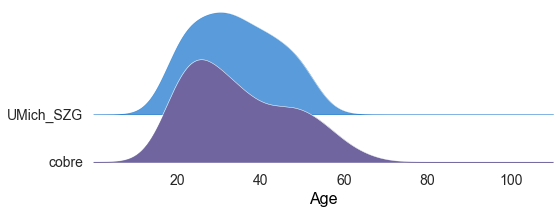

In [69]:
plt.figure(dpi=380)
fig, axes = joypy.joyplot(df_transfer_sz, column=['age'], overlap=1.0, by="site", ylim='own', fill=True, figsize=(8,3), legend=False, xlabels=True, ylabels=True,  x_range=(0,110), 
                          colormap=lambda x: color_gradient(x, start=(.08, .45, .8),stop=(.8, .34, .44)), alpha=0.6, linewidth=.5, linecolor='w', fade=True)
#plt.title('Age Distribution', fontsize=18, color='black', alpha=1)
plt.rc("font", size=14)
plt.xlabel('Age', fontsize=16, color='black', alpha=1)
plt.ylabel('Site', fontsize=14, color='black', alpha=1)
#plt.show()
plt.savefig('Transfer_sz_age_site.png', dpi=300)

<Figure size 2280x1520 with 0 Axes>

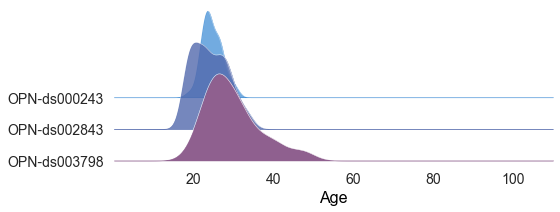

In [67]:
plt.figure(dpi=380)
fig, axes = joypy.joyplot(df_transfer_opn, column=['age'], overlap=1.0, by="site", ylim='own', fill=True, figsize=(8,3), legend=False, xlabels=True, ylabels=True,  x_range=(0,110), 
                          colormap=lambda x: color_gradient(x, start=(.08, .45, .8),stop=(.8, .34, .44)), alpha=0.6, linewidth=.5, linecolor='w', fade=True)
#plt.title('Age Distribution', fontsize=18, color='black', alpha=1)
plt.rc("font", size=14)
plt.xlabel('Age', fontsize=16, color='black', alpha=1)
plt.ylabel('Site', fontsize=14, color='black', alpha=1)
#plt.show()
plt.savefig('Transfer_OPN_age_site.png', dpi=300)

In [57]:
df = pd.merge(df_tr, df_te, how='outer')

In [44]:
import seaborn as sns

In [45]:
sns.set_style('whitegrid')

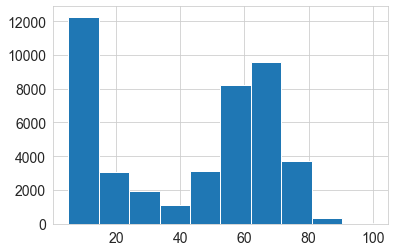

In [46]:
plt.hist(df_sa['age']);
plt.savefig('fullsample_surfarea_allsites_age.png', dpi=300)

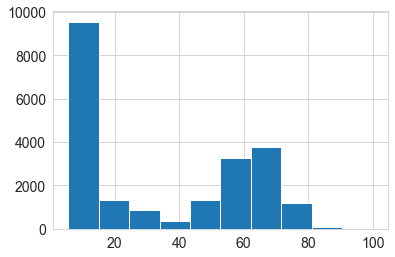

In [58]:
plt.hist(df['age']);
plt.savefig('full_train_test_controls_age.png', dpi=300)